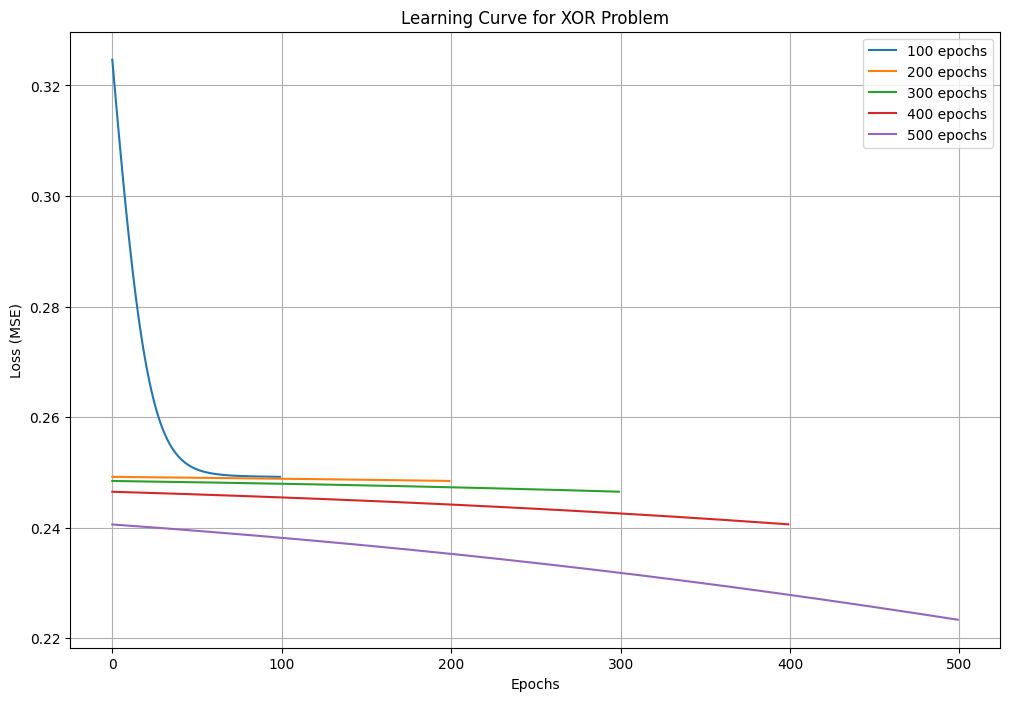

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Mean Squared Error Loss function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initialize weights and biases
input_layer_neurons = 2
hidden_layer_neurons = 2
output_neurons = 1

# Random weights and bias initialization
np.random.seed(42)
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
bias_output = np.random.uniform(size=(1, output_neurons))

# Training parameters
learning_rate = 0.1
epochs_list = [100, 200, 300, 400, 500]
correct_loss_history = []

# Training loop
for max_epochs in epochs_list:
    epoch_losses = []
    for epoch in range(max_epochs):
        # Forward Pass
        hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
        hidden_layer_output = sigmoid(hidden_layer_input)

        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
        predicted_output = sigmoid(output_layer_input)

        # Calculate the loss
        loss = mse_loss(y, predicted_output)
        epoch_losses.append(loss)

        # Backward Pass and Update Weights
        error = y - predicted_output
        d_predicted_output = error * sigmoid_derivative(predicted_output)

        error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
        bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
        weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
        bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    correct_loss_history.append(epoch_losses)

# Plotting the learning curves
plt.figure(figsize=(12, 8))
for i, epochs in enumerate(epochs_list):
    plt.plot(range(len(correct_loss_history[i])), correct_loss_history[i], label=f'{epochs} epochs')
plt.title('Learning Curve for XOR Problem')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()
